<a href="https://colab.research.google.com/github/AuraFrizzati/Genomic-Data-Science-Specialisation-Coursera/blob/main/Algorithms%20for%20DNA%20sequencing%20-%20Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week1: DNA sequencing, strings and matching**

Welcome to Algorithms for DNA Sequencing!

This module we begin our exploration of algorithms for analyzing DNA sequencing data. We'll discuss DNA sequencing technology, its past and present, and how it works. We'll learn more about DNA and genomes and we'll make the connection that a DNA molecule can be represented as a string of characters. This observation is the key that unlocks the entire rest of the course! It allows us to take methods from computer science that were invented to work with generic strings (web pages, books, files on your hard drive) and apply them to DNA.

We will also define the two computational problems that motivate our technical discussions for the rest of the course. The **read alignment problem** and the **assembly problem**. The rest of the course is divided into halves where we will discuss foundational algorithms and data structures for those two crucial problems.

In the practical sessions and homeworks, you will be working with real genomes and real sequencing data, including some human data. And you will start to write software to analyze them. You will learn how to work with important file formats like FASTA and FASTQ, and you will look for some basic patterns in that sequencing data. Finally, we will discuss the naive exact matching algorithm a simple, flexible, but not very fast algorithm for finding patterns in text. Next module we'll discuss algorithms that are a bit more clever, and see some new data structures as well.

Your first two assignments, Programming Homework 1 and the Module 1 Quiz are due this week. Please also be sure to read the syllabus for all of the details about course logistics.



## **1.01: String basics**

In [ ]:
# define a new sequence
seq = 'ACGT'
print(seq[1])
len(seq)

C


4

In [ ]:
# empty string
e = ''
print(e)
len(e)

0

In [ ]:
## concatenation
seq1 = 'AACC'
seq2 = 'GGTT'
print(seq1 + seq2)

AACCGGTT


In [ ]:
seqs = ['A','C','G','T']
print(''.join(seqs)) #'' denotes no space between letters

ACGT


In [ ]:
## Generate a random nucleotide
import random
random.choice('ACGT')

'A'

In [ ]:
## Generate a random sequence
seq = ''
for _ in range(10): # _ used as the loop's counter since it does not get further called 
  seq += random.choice('ACGT')
print(seq)

GTGTCAGAGG


In [ ]:
# alternative way to generate a random sequence
seq = ''.join([random.choice('ACGT') for _ in range(10)])
print(seq)

TCCTCTTCAA


## **1.02: Manipulating DNA strings**



In [ ]:
## Find the longest common prefix
def longestCommonPrefix(s1,s2):
  i = 0
  while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
    i += 1
  return s1[:i]

longestCommonPrefix('ACCATTG','ACCAAGTC')

'ACCA'

In [ ]:
## Find if two sequences match

def match(s1,s2):
  if not len(s1) == len(s2):
    return False
  for i in range(0, len(s1)):
    if not s1[i]==s2[i]:
      return False
  return True

match('ACCATTG', 'ACCATTG')


True

In [ ]:
## Find the reverse complement of a sequence

def reverseComplement(s):
  complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}
  t = ''
  for base in s:
    # note: the complementary sequence runs in the opposite direct, thus bases get pre-pended
    t = complement[base]+t 
  return t

reverseComplement('ACCATTG')

'CAATGGT'

## **1.03: Downloading & parsing a genome**



In [ ]:
# Following line downloads FASTA file containing the lambda phage reference genome
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2021-06-14 15:14:54--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.221.114, 99.84.221.117, 99.84.221.168, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.221.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.001s  

2021-06-14 15:14:55 (56.9 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [ ]:
%cd content #working directory
%ls

[Errno 2] No such file or directory: 'content'
/content
drive/  lambda_virus.fa  sample_data/


In [ ]:
with open('lambda_virus.fa') as f:
    contents = f.read()
    print(contents[:500])

>gi|9626243|ref|NC_001416.1| Enterobacteria phage lambda, complete genome
GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCG
TCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGC
TTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCA
GCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTG
CGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGG
ATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCT



In [ ]:
## function to read the genome file
def readGenome(filename):
  genome = ''
  with open(filename, 'r') as f:
    for line in f:
      #ignore header line with genome information
      if not line[0] =='>':
        genome += line.rstrip() ## .rstrip() is to remove new line characters
  return genome

genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [ ]:
## Count the number of occurrences of each base
counts = {'A':0, 'C':0, 'G':0, 'T':0} #initialise dictionary
for base in genome:
  counts[base] += 1
print(counts)


{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [ ]:
import collections
collections.Counter(genome)

Counter({'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986})

## **1.04: Sequencing errors and base qualities**

- In NGS, the **basecaller** software analyses and interprets the images of the reads. It neads to deal with ambiguity because sometimes the signal gets noisy.  
- For each base call, the basecaller reports its **base quality (Q)**, which is the basecaller's estimate of the **probability (p) that the base was called incorrectly**:
$$Q = -10*log_{10}p$$
  The way the expression is formulated allows an easier interpretation of p (e.g. p = 0.1 --> Q = 10, p = 0.001 --> Q = 30)

- The sequencing software estimates p as amount of light of not-expected wave length divided by the total amount of light:

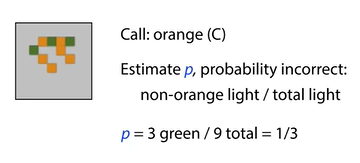




## **10.05: Sequencing reads in FASTQ format**

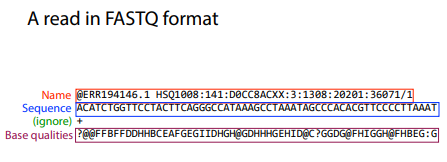

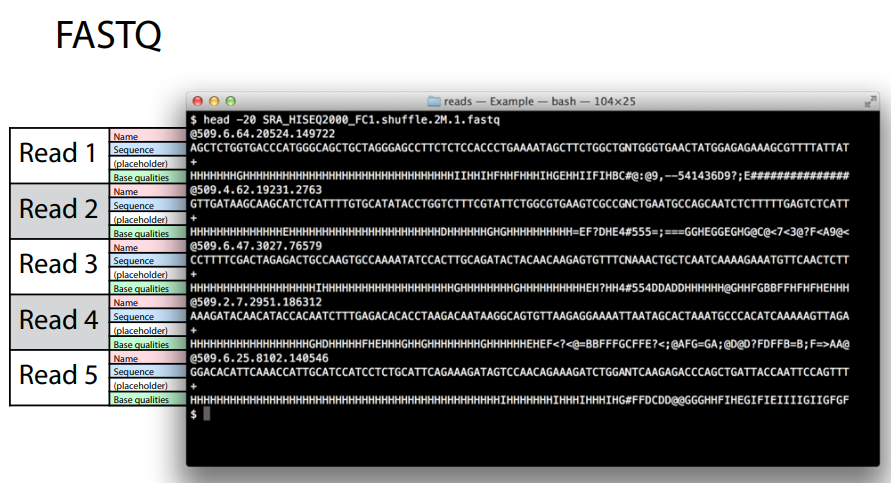

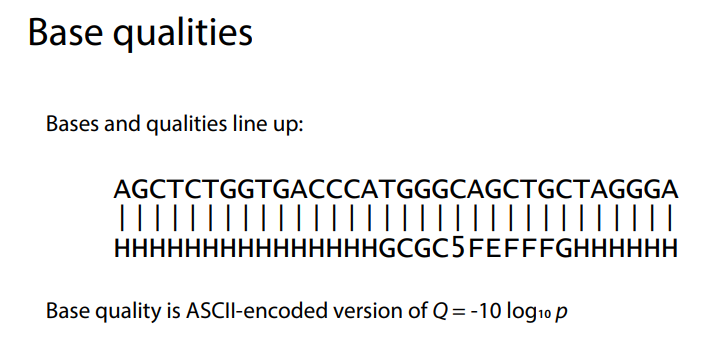

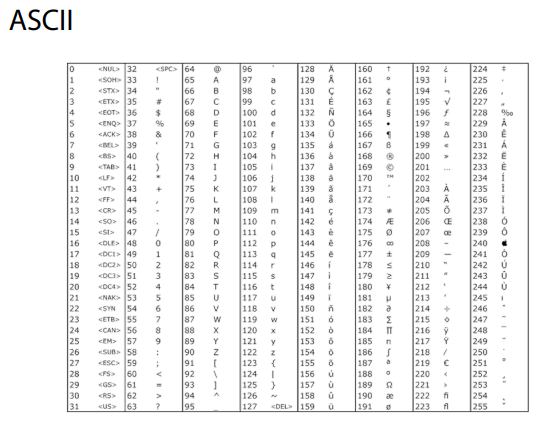

### **Base qualities**
- Usual **ASCII encoding** is **Phred+33**: take Q, rounded to integer, add 33, convert into ACII character

In [ ]:
def QtoPhred33(Q):
  """ Turn Q into Phred+33 ASCII-encoded quality """
  return chr(Q+33) #converts integer to character according to ASCII table

QtoPhred33(50)

'S'

In [ ]:
def Phred33toQ(qual):
  """ Turn Phred+33 ASCII-encoded quality into Q """
  return ord(qual)-33 #converts character to integer according to ASCII table

Phred33toQ('S')

50

## **10.06: Working on sequencing reads**


In [ ]:
## download reads
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2021-06-14 18:51:46--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.221.117, 99.84.221.168, 99.84.221.66, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.221.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.005s  

2021-06-14 18:51:46 (44.1 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [ ]:
%ls #SRR835775_1.first1000.fastq

drive/  lambda_virus.fa  sample_data/  SRR835775_1.first1000.fastq


In [ ]:
print((open("SRR835775_1.first1000.fastq", "r").read())[:1000])

@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################
@SRR835775.2 2/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC
+
CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########
@SRR835775.3 3/1
TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG
+
@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A
@SRR835775.4 4/1
TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA
+
@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################
@SRR835775.5 5/1
CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCAC

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')
print(seqs[:10])
print(quals[:10])



FileNotFoundError: ignored

In [ ]:
## To create a histogram of the quality scores, to see which are more or less common
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = Phred33toQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


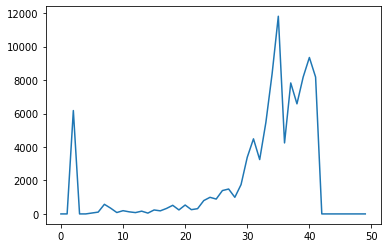

In [ ]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

## **10.07: Analysing reads by position**

The **GC content** is the **fraction of the genome that contains G's or C's**, and it **differs from species to species**.

In this tutorial we are just using GC content as a way to figure out whether the mix of different bases is changing as we move along the read. We expect it won't change very much...

But it something bad is going on (e.g. one particularly bad seqeuncing cycle) then we might see a very different mix of G's and C's relative to the other bases

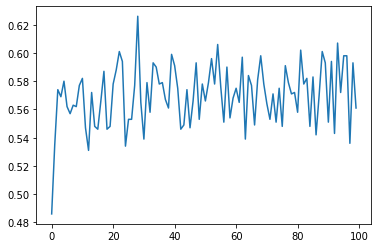

In [ ]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    
    ## Number of GC bases seen at each position in the reads:
    gc = [0] * 100 # in the dataset used all the reads are 100 bases long

    ## Total number of bases seen at each position in the reads:
    totals = [0] * 100
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i]) # calculate the average 'GC' content at each position
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

- The GC content looks quite constant along the reads, although there is a lot of fluctuation, possibly due to noise (we are not looking at many sequencing reads!).
- The **GC content is consistently > 0.5**, because we are using the **human genome**.

No we can look at the distribution of bases in the sequence reads:

In [ ]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'A': 21132, 'C': 28272, 'G': 28742, 'N': 18, 'T': 21836})

- Also from this analysis it is visible the GC content is higher than AT.
- 'N' indicates that the base caller has no confidence in making a base call because it does not have good evidence to support one base over the other.

## **10.08: Sequencers give pieces to genomic puzzles**

- The reads are 100 nt long, very short for any analysis (genomes are usually on the order of thousands of bases long)
- We need to stitch the reads together to reconstruct the original genome.
- Unrelated humans have genomes that are 99.8-99.9% similar -> we can use a generic human genome as a template to reconstruct another human genome.
- We have reference genomes for many species (not just humans!)
- **Alignment** vs **assembly** problem



## **10.08: Read alignment and why it's hard**

- We are looking for the place in the reference genome where the sequence reads match most closely
- Challenges:
  - NGS outputs are on the order of billion of sequencing reads per sequencing run
  - The reference genomes can be very long, in the order of million of bases (e.g. human genome is 3 billion bases long)
- The good news is that in computer science there has been a long tradition of working with and **manipulating strings** and many **algorithms** and **data structures** have been invented for a variety of purposes (e.g. finding patterns, indexing, compressing, etc)

## **10.09: Naive exact matching**

### **Exact matching:**
At what offset (the most left character) does *pattern P* occur within *text T*?

P: word  
T: There whould have been a time for such a <u>word</u>  
(Answer: offset 40)  

Using python:

In [ ]:
t = 'There would have been a time for such a word'
t.find('word') # .find() is a python string method: Text.find('pattern')

40

Trying to create the algorithm ourselves...
### Exact matching: naive algorithm

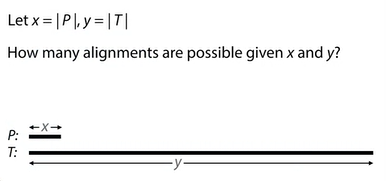

How many alignments are possible given x and y?  
Answer: $y-x+1$

What is the greatest # character comparison possible?  
Answer: $x*(y-x+1)$ [# of characters in P times the max # of alignments possible (worst case scenarios is where each character of P matches with each character of T --> we go thorugh the inner loop of the algorithm for the max number of times)


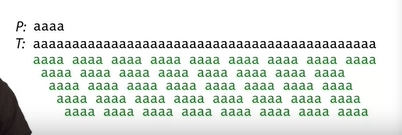





What is the least # of character comparisons possible?   
$y-x+1$ (at least one character comparison per alignment, but the first character is always a mismatch):

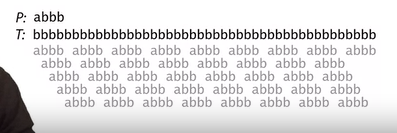



How many character comparisons in this example?

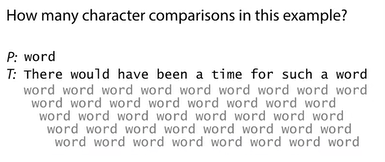

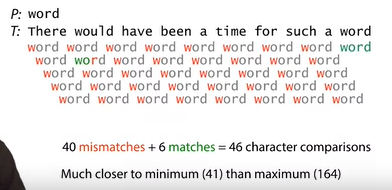

How many character comparisons occur when matching P = `AAA` to T = `AAATAA`?

mismatches (3) + matches (= 6) = 9

In [ ]:
%mkdir 'Cousera_AlgorithmsDNA'

In [ ]:
%cd Cousera_AlgorithmsDNA

/content/Cousera_AlgorithmsDNA


## **10.10: Matching artificial reads**

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2021-06-14 21:18:03--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.221.66, 99.84.221.168, 99.84.221.114, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.221.66|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2021-06-14 21:18:04 (400 MB/s) - ‘phix.fa’ saved [5528/5528]



In [ ]:
%ls

phix.fa


In [ ]:
print((open("phix.fa", "r").read())[:1000])

>gi|216019|gb|J02482.1|PX1CG Coliphage phi-X174, complete genome
GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTT
GATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAA
ATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTG
TCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTA
GATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATC
TGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTT
TCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTT
CGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCT
TGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCG
TCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTAC
GGAAAACATTATTAATGGCGTCGAGCGTCCGGTTAAAGCCGCTGAATTGTTCGCGTTTACCTTGCGTGTA
CGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAG
TGATGTAATGTCTAAAGGTAAAAAACGTTCTGGCGCTCGCCCTGGTCGTCCGCAGCCGTTGCGAGGTACT
AAAGGCAAGCGT

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [ ]:
genome = readGenome('phix.fa')
genome[:100]

'GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTA'

In [ ]:
def naive(p,t):
  occurrences = []
  for i in range(len(t)-len(p)+1): # loop over alignments (every position in t where p can match without running past the end of t)
    match = True 
    for j in range(len(p)): #loop over characters
      if t[i+j] != p[j]: # compare characters
        match = False #mismatch; reject alignment
        break
    if match:
      occurrences.append(i) # all characters matched; record
  return occurrences

In [ ]:
## extract the alignment offsets:
t = 'AGCTTAGATAGC' #text
p = 'AG' # pattern
naive(p, t)

[0, 5, 9]

In [ ]:
## Generate some random reads from the genome:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads


In [ ]:
# Generate 100 reads of length 100
reads = generateReads(genome, 100, 100)
# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


## **10.11: Matching real reads**

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2021-06-14 21:30:31--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.221.168, 99.84.221.117, 99.84.221.114, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.221.168|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  --.-KB/s    in 0.005s  

2021-06-14 21:30:32 (44.4 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [ ]:
%ls

ERR266411_1.first1000.fastq  phix.fa


In [ ]:
def readFastq(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

In [ ]:
import collections
phix_reads = readFastq('ERR266411_1.first1000.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
count

Counter({'A': 28426, 'C': 21890, 'G': 19147, 'N': 6, 'T': 30531})

In [ ]:
numMatched = 0
n = 0
for r in phix_reads:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

7 / 1000 reads matched the genome exactly!


Reasons why the sequences do not align very well:
- presence of sequencing errors
- individual differences between the reference genome and the genome of the organism getting sequenced
- The genome is double stranded and the reads can come from one strand or the other, but the exact matching probel we have set up is only looking at one of those 2 strands...

In [ ]:
# Now let's try matching just the first 30 bases of each read
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

459 / 1000 reads matched the genome exactly!


In [ ]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

932 / 1000 reads matched the genome exactly!


Exact matching algorithms are not ideal because we want to allow for sequencing errors and for differences between individuals --> approximate matching algorithms

Question: Say we have a function that generates a random DNA string, i.e. the kind of string we would get by rolling a 4-sided die (A/C/G/T) over and over. We use the function to generate a random pattern P of length 20 and a random text T of length 100. Now we run the naive exact matching algorithm to find matches of P within T. We expect the total number of character comparisons we perform to be closer to the...**minimum possible**

## **Programming Homework 1 Instructions (Read First)**

In lecture and in a practical, we saw an implementation of the naive exact matching algorithm:

In [ ]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

...and we saw a function that takes a DNA string and returns its reverse complement:

In [ ]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

reverseComplement('AAA')

'TTT'

...and we saw a function that parses the read and quality strings from a FASTQ file containing sequencing reads.

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

Next, download and parse the lambda virus genome, at: https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

In [ ]:
def naive_with_rc(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        
        ##check forward strand
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
            
    
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        ##check reverse strand
        p_rev = reverseComplement(p)
        if p_rev!=p:
          for j in range(len(p_rev)):  # loop over characters
            if t[i+j] != p_rev[j]:  # compare characters
                match = False
                break
          if match:
            occurrences.append(i)  # all chars matched; record
            
        
        
    return occurrences

In [ ]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [ ]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [ ]:
# Phi-X genome
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2021-06-14 22:10:29--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 99.86.227.9, 99.86.227.137, 99.86.227.158, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|99.86.227.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa.1’

phix.fa.1           100%[===================>]   5.40K  --.-KB/s    in 0s      

2021-06-14 22:10:30 (509 MB/s) - ‘phix.fa.1’ saved [5528/5528]



In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [ ]:
phix_genome = readGenome('phix.fa')
occurrences = naive_with_rc('ATTA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 62


In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 60


1) How many times does $AGGT$ or its reverse complement $ACCT$ occur in the lambda virus genome?  E.g. if $AGGT$ occurs 10 times and $ACCT$ occurs 12 times, you should report 22.

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2021-06-14 22:14:58--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.221.168, 99.84.221.117, 99.84.221.66, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.221.168|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0s      

2021-06-14 22:14:59 (201 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [ ]:
lambda_genome = readGenome('lambda_virus.fa')
occurrences = naive_with_rc('AGGT', lambda_genome)
print('# occurrences: %d' % len(occurrences))

# occurrences: 306


2) How many times does $TTAA$ or its reverse complement occur in the lambda virus genome?  

Hint: $TTAA$ and its reverse complement are equal, so remember not to double count.

In [ ]:
occurrences = naive_with_rc('TTAA', lambda_genome)
print('# occurrences: %d' % len(occurrences))

# occurrences: 195


3) What is the offset of the leftmost occurrence of $ACTAAGT$ or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of $ACTAAGT$ is at offset 40 (0-based) and the leftmost occurrence of its reverse complement $ACTTAGT$ is at offset 29, then report 29.

In [ ]:
occurrences = naive_with_rc('ACTAAGT', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 26028


4) Question 4
What is the offset of the leftmost occurrence of $AGTCGA$ or its reverse complement in the Lambda virus genome?

In [ ]:
occurrences = naive_with_rc('AGTCGA', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 450


5) Question 5
As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

In [ ]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mismatches = 0 #this needs to be re-initialised at the beginning of each outer loop
        match = True
        for j in range(len(p)):  # loop over characters
          if t[i+j] != p[j]:  # compare characters
                mismatches += 1 
          if mismatches > 2:  
            match = False
            break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

For example, `ACTTTA` occurs twice in `ACTTACTTGATAAAGT`, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So `naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')` should return the list [0, 4].

In [ ]:
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [ ]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[10, 24, 38]


In [ ]:
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 10
# occurrences: 79


How many times does `TTCAAGCC` occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2021-06-14 22:56:12--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.221.66, 99.84.221.168, 99.84.221.117, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.221.66|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.003s  

2021-06-14 22:56:12 (16.4 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [ ]:
lambda_genome = readGenome('lambda_virus.fa.1')

In [ ]:
occurrences = naive_2mm('TTCAAGCC', lambda_genome)
print('# occurrences: %d' % len(occurrences))

# occurrences: 191


6) What is the offset of the leftmost occurrence of `AGGAGGTT` in the Lambda virus genome when allowing up to 2 mismatches?

In [ ]:
occurrences = naive_2mm('AGGAGGTT', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences)) 

offset of leftmost occurrence: 49


7) Question 7
Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

In [ ]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2021-06-14 22:39:30--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.221.168, 99.84.221.117, 99.84.221.114, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.221.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.007s  

2021-06-14 22:39:30 (31.3 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [ ]:
ERR037900_1_reads = readFastq('ERR037900_1.first1000.fastq')
ERR037900_1_reads[1][0]

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E'

0.055


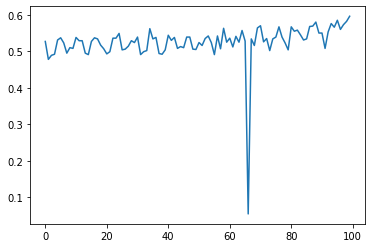

In [ ]:
gc = findGCByPos(ERR037900_1_reads[0])
print(min(gc))
plt.plot(range(len(gc)), gc)
plt.show()

In [ ]:
import numpy as np
np.argmin(gc)

66